#Part 1: EDA

#Structured Approach to EDA for MMM

##Data Structure & Quality Assessment
- Temporal coverage analysis to ensure sufficient time periods for modeling

- Missing value detection and handling strategy

- Outlier identification using IQR method for all numeric variables

- Distribution analysis of sales and marketing investments

##Multi-Dimensional Time Series Analysis
- Decompose sales into trend, seasonality, and residual components

- Apply rolling averages to identify underlying patterns

- Calculate week-over-week and year-over-year growth rates

- Map sales against key business/marketing events

##Marketing Channel Analysis
- Correlation and lag analysis between channels and sales

- Spend vs. impression effectiveness comparison

- Cross-channel interaction assessment

- Saturation and diminishing returns investigation

##Promotional Effectiveness Deep-Dive
- Multi-dimensional discount analysis

- Holiday impact quantification

- Discount combination performance evaluation

- Price elasticity estimation

##External Factor Integration
- Economic indicator correlation analysis

- Category-specific external variable assessment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
from google.colab import files

In [2]:
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [3]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving fm.xlsx to fm.xlsx


In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Time Period: {df['Week_Ending'].min()} to {df['Week_Ending'].max()}")
print(f"Total Weeks: {df.shape[0]}")

Dataset Shape: (122, 24)
Time Period: 2022-02-05 00:00:00 to 2024-06-01 00:00:00
Total Weeks: 122


In [5]:
print("\nFirst 5 rows of data:")
print(df.head())


First 5 rows of data:
  Department Week_Ending     Year       MAT         Sales  Discount1  \
0    Brand A  2022-02-05  FY_2022  MAT_2022  5.549708e+07   0.039253   
1    Brand A  2022-02-12  FY_2022  MAT_2022  5.773779e+07   0.037425   
2    Brand A  2022-02-19  FY_2022  MAT_2022  5.404445e+07   0.061313   
3    Brand A  2022-02-26  FY_2022  MAT_2022  5.577581e+07   0.066293   
4    Brand A  2022-03-05  FY_2022  MAT_2022  5.839206e+07   0.047306   

   Discount2  Holiday Dummy   Total SKU  Gasoline Price  ...  \
0   0.015600              0  29882443.5       1070.8565  ...   
1   0.014623              0  29719511.5       1070.8565  ...   
2   0.010034              0  29353173.5       1070.8565  ...   
3   0.023455              0  29324354.5       1070.8565  ...   
4   0.015688              0  29192688.0       1282.7465  ...   

   Modular Video Impressions  Modular Video Spends  Paid Social Impressions  \
0                 11599332.5         815220.956832              280464068.5   
1

In [6]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")


Missing Values:
Unnamed: 20        122
Unnamed: 21        122
Data Dictionary    105
Unnamed: 23        105
dtype: int64


In [7]:
df['Week_Ending'] = pd.to_datetime(df['Week_Ending'])
df.set_index('Week_Ending', inplace=True)

In [8]:
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
                            count          mean           std           min  \
Sales                       122.0  4.716817e+07  4.904374e+06  3.158512e+07   
Discount1                   122.0  4.586523e-02  2.053190e-02  1.362011e-02   
Discount2                   122.0  4.845419e-02  6.693157e-02  2.512857e-03   
Holiday Dummy               122.0  1.639344e-02  1.275067e-01  0.000000e+00   
Total SKU                   122.0  2.733039e+07  1.986457e+06  2.377588e+07   
Gasoline Price              122.0  1.141035e+03  1.287791e+02  9.660105e+02   
Average Price               122.0  1.823251e+01  2.356306e-01  1.771626e+01   
Email Clicks                122.0  4.383132e+05  1.746694e+05  1.655045e+05   
Email Spends                122.0  3.773454e+04  1.503735e+04  1.424834e+04   
Organic Search Impressions  122.0  1.973459e+06  3.844069e+05  8.734215e+05   
Modular Video Impressions   122.0  1.342260e+07  6.033649e+06  1.924108e+06   
Modular Video Spends        122

Data Preprocessing

In [9]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

for column in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers(df, column)
    if len(outliers) > 0:
        print(f"Outliers detected in {column}: {len(outliers)} values")
        print(f"Outlier percentage: {len(outliers) / len(df) * 100:.2f}%")

Outliers detected in Sales: 3 values
Outlier percentage: 2.46%
Outliers detected in Discount1: 1 values
Outlier percentage: 0.82%
Outliers detected in Discount2: 13 values
Outlier percentage: 10.66%
Outliers detected in Holiday Dummy: 2 values
Outlier percentage: 1.64%
Outliers detected in Gasoline Price: 9 values
Outlier percentage: 7.38%
Outliers detected in Email Clicks: 4 values
Outlier percentage: 3.28%
Outliers detected in Email Spends: 4 values
Outlier percentage: 3.28%
Outliers detected in Organic Search Impressions: 4 values
Outlier percentage: 3.28%
Outliers detected in Modular Video Impressions: 2 values
Outlier percentage: 1.64%
Outliers detected in Modular Video Spends: 2 values
Outlier percentage: 1.64%
Outliers detected in Paid Search Impressions: 4 values
Outlier percentage: 3.28%
Outliers detected in Paid Search Spends: 4 values
Outlier percentage: 3.28%


In [10]:
df['Sales_WoW_Change'] = df['Sales'].pct_change() * 100
df['Sales_4W_MA'] = df['Sales'].rolling(window=4).mean()

In [11]:
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['Year'] = df.index.year
df['Week_of_Year'] = df.index.isocalendar().week

Time-Series Analysis

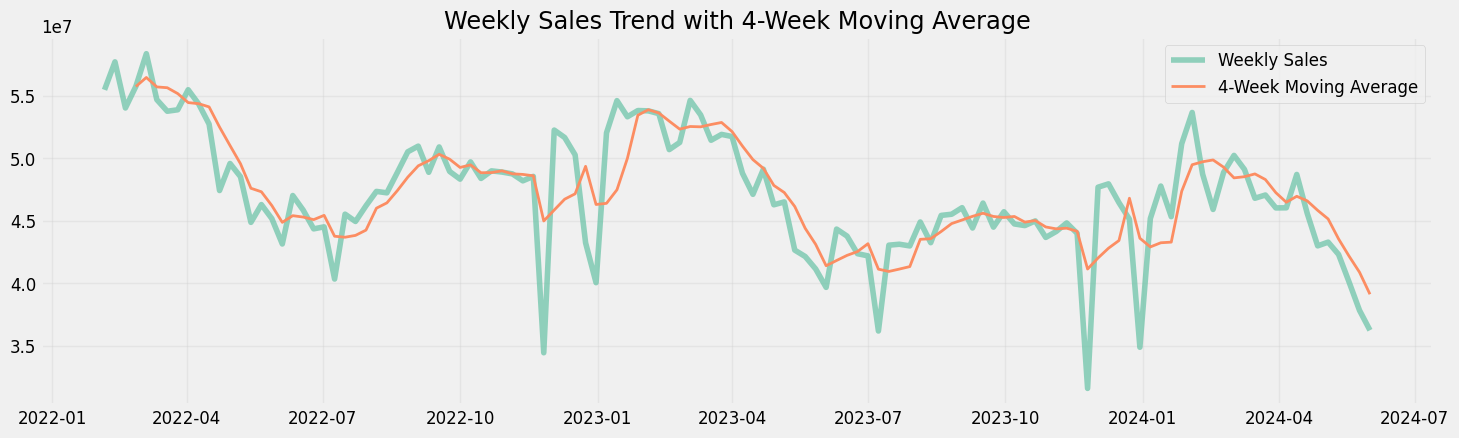

In [12]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Sales'], label='Weekly Sales', alpha=0.7)
plt.plot(df.index, df['Sales_4W_MA'], label='4-Week Moving Average', linewidth=2)
plt.title('Weekly Sales Trend with 4-Week Moving Average')
plt.legend()
plt.grid(True, alpha=0.3)

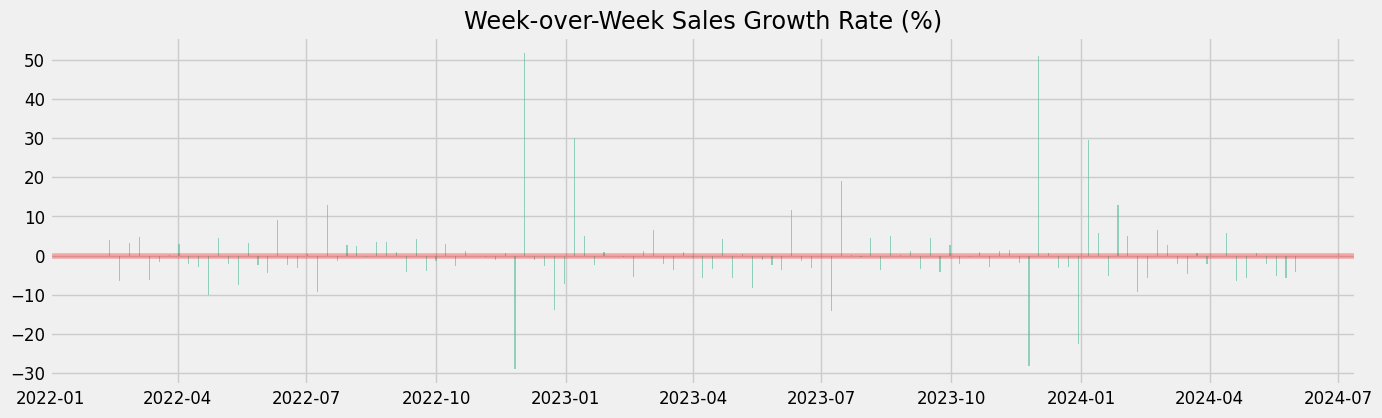

In [13]:
plt.subplot(2, 1, 2)
plt.bar(df.index, df['Sales_WoW_Change'], alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Week-over-Week Sales Growth Rate (%)')
plt.tight_layout()
plt.savefig('sales_trend_analysis.png')
plt.show()

Seasonal Pattern Analysis

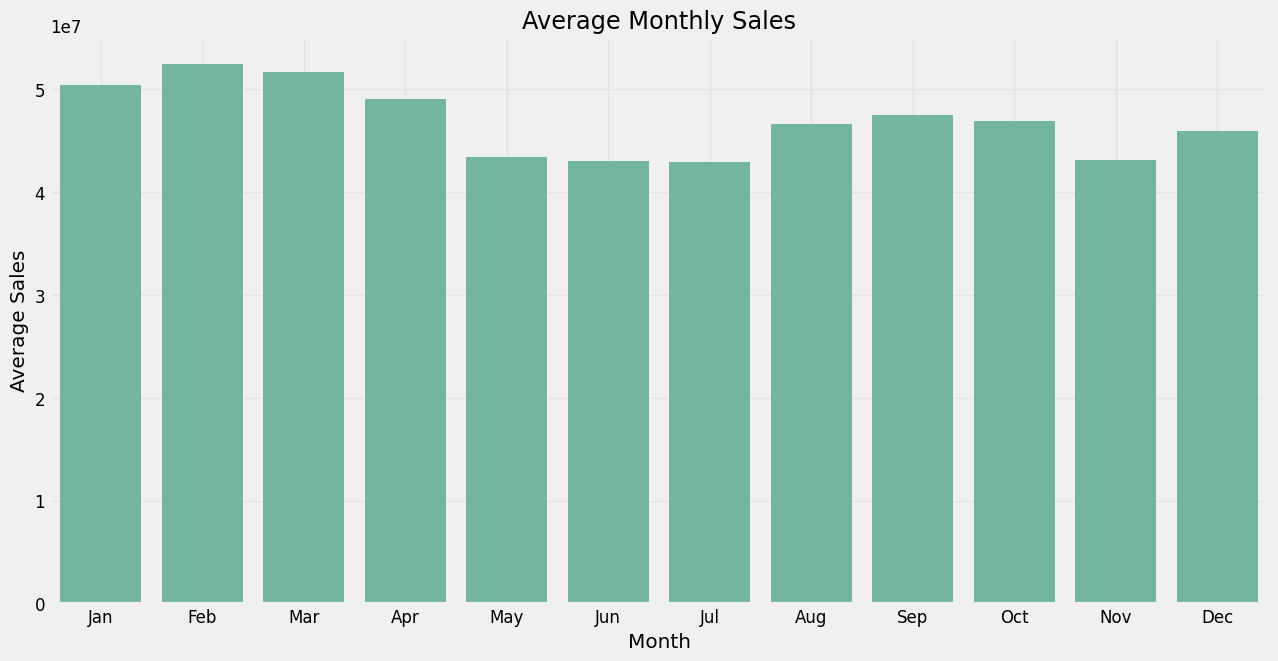

In [14]:
monthly_sales = df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.savefig('monthly_sales_pattern.png')
plt.show()

<ipython-input-15-555aca67088b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Sales'].resample('M').mean()


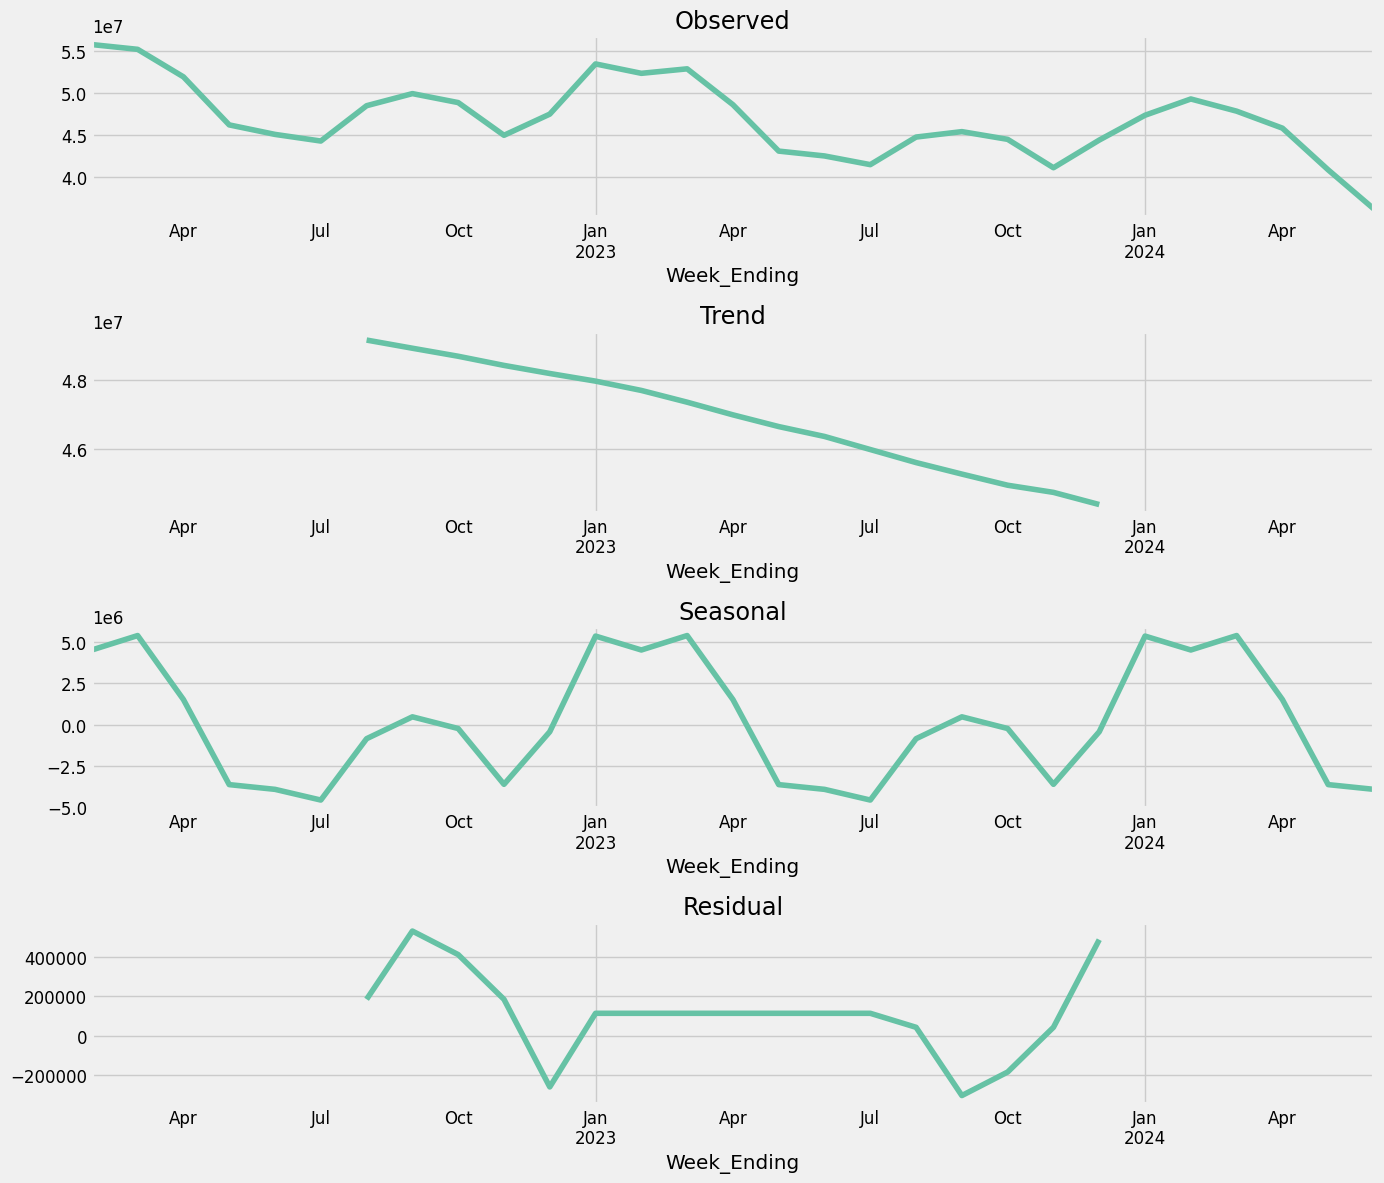

In [15]:
#decompose the time series for seasonal patterns
try:
    monthly_df = df['Sales'].resample('M').mean()
    result = seasonal_decompose(monthly_df, model='additive', period=12)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
    result.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    result.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    result.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    result.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.savefig('seasonal_decomposition.png')
    plt.show()
except Exception as e:
    print(f"Seasonal decomposition failed: {e}")
    print("Try with a longer time series or different periodicity")

Marketing Channel Analysis

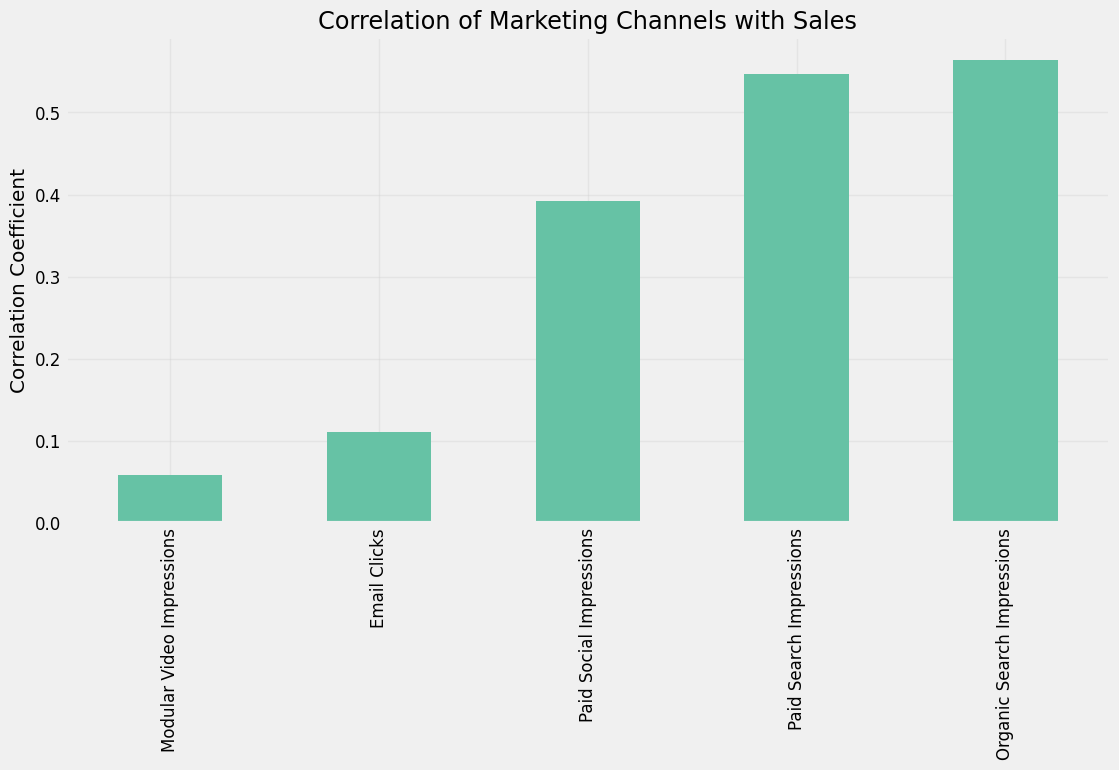

In [16]:
marketing_channels = ['Paid Search Impressions', 'Paid Social Impressions', 'Modular Video Impressions', 'Email Clicks', 'Organic Search Impressions']
correlations = df[marketing_channels + ['Sales']].corr()['Sales'].drop('Sales')
plt.figure(figsize=(12, 6))
correlations.sort_values().plot(kind='bar')
plt.title('Correlation of Marketing Channels with Sales')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.savefig('marketing_channel_correlation.png')
plt.show()

Economic Factor Analysis

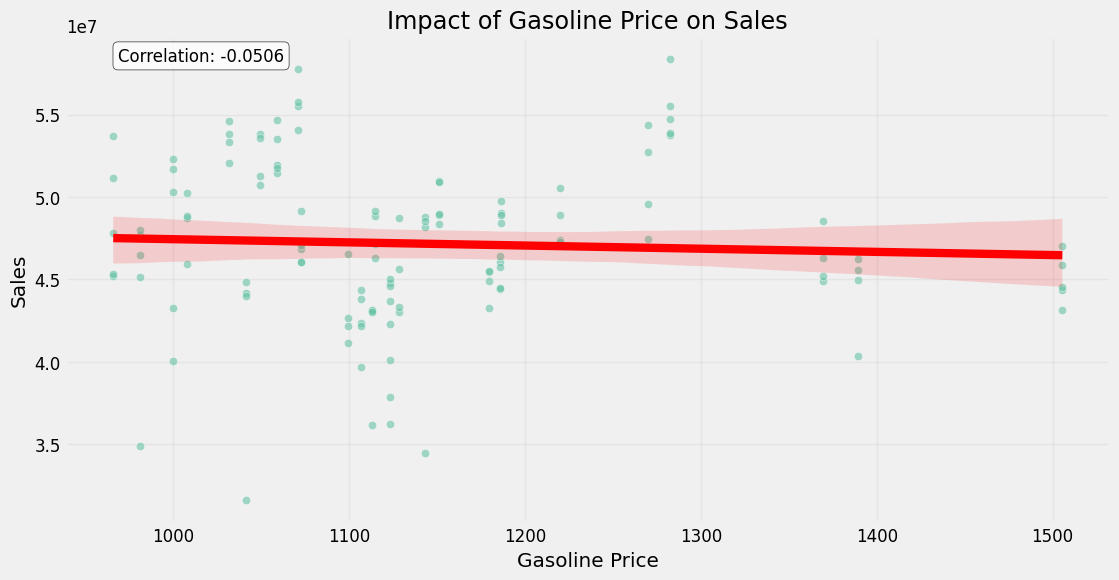

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Gasoline Price', y='Sales', data=df, alpha=0.6)
plt.title('Impact of Gasoline Price on Sales')
plt.xlabel('Gasoline Price')
plt.ylabel('Sales')
sns.regplot(x='Gasoline Price', y='Sales', data=df, scatter=False, color='red')
plt.grid(True, alpha=0.3)
gas_corr = df['Sales'].corr(df['Gasoline Price'])
plt.annotate(f'Correlation: {gas_corr:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))
plt.savefig('gasoline_price_impact.png')
plt.show()

Promotion Impact Analysis

In [19]:
discount_groups = df.groupby(['Discount1', 'Discount2'])['Sales'].agg(['mean', 'count', 'std'])
discount_groups = discount_groups.reset_index()
discount_groups.columns = ['Discount1', 'Discount2', 'Avg_Sales', 'Weeks', 'Sales_StdDev']
discount_groups['Sales_In_Millions'] = discount_groups['Avg_Sales'] / 1000000
print("Sales Performance by Discount Combination:")
print(discount_groups.sort_values('Avg_Sales', ascending=False))


Sales Performance by Discount Combination:
     Discount1  Discount2     Avg_Sales  Weeks  Sales_StdDev  \
75    0.047306   0.015688  5.839206e+07      1           NaN   
42    0.037425   0.014623  5.773779e+07      1           NaN   
105   0.066293   0.023455  5.577581e+07      1           NaN   
116   0.074912   0.015362  5.550484e+07      1           NaN   
50    0.039253   0.015600  5.549708e+07      1           NaN   
..         ...        ...           ...    ...           ...   
88    0.056546   0.057682  3.624169e+07      1           NaN   
23    0.030798   0.007515  3.617963e+07      1           NaN   
77    0.048346   0.003681  3.488112e+07      1           NaN   
80    0.049173   0.005968  3.444005e+07      1           NaN   
49    0.039243   0.022613  3.158512e+07      1           NaN   

     Sales_In_Millions  
75           58.392061  
42           57.737794  
105          55.775815  
116          55.504837  
50           55.497076  
..                 ...  
88           

Duplicate discount combinations found after rounding:
     Discount1  Discount2     Avg_Sales  Weeks  Sales_StdDev  \
3         0.02       0.01  4.854115e+07      1           NaN   
5         0.02       0.01  4.972631e+07      1           NaN   
6         0.02       0.01  4.519051e+07      1           NaN   
10        0.02       0.01  4.889301e+07      1           NaN   
7         0.02       0.02  4.881628e+07      1           NaN   
..         ...        ...           ...    ...           ...   
105       0.07       0.02  5.577581e+07      1           NaN   
116       0.07       0.02  5.550484e+07      1           NaN   
102       0.07       0.03  4.450061e+07      1           NaN   
108       0.07       0.03  4.367716e+07      1           NaN   
109       0.07       0.03  4.573348e+07      1           NaN   

     Sales_In_Millions  
3            48.541155  
5            49.726311  
6            45.190514  
10           48.893006  
7            48.816279  
..                 ...  
10

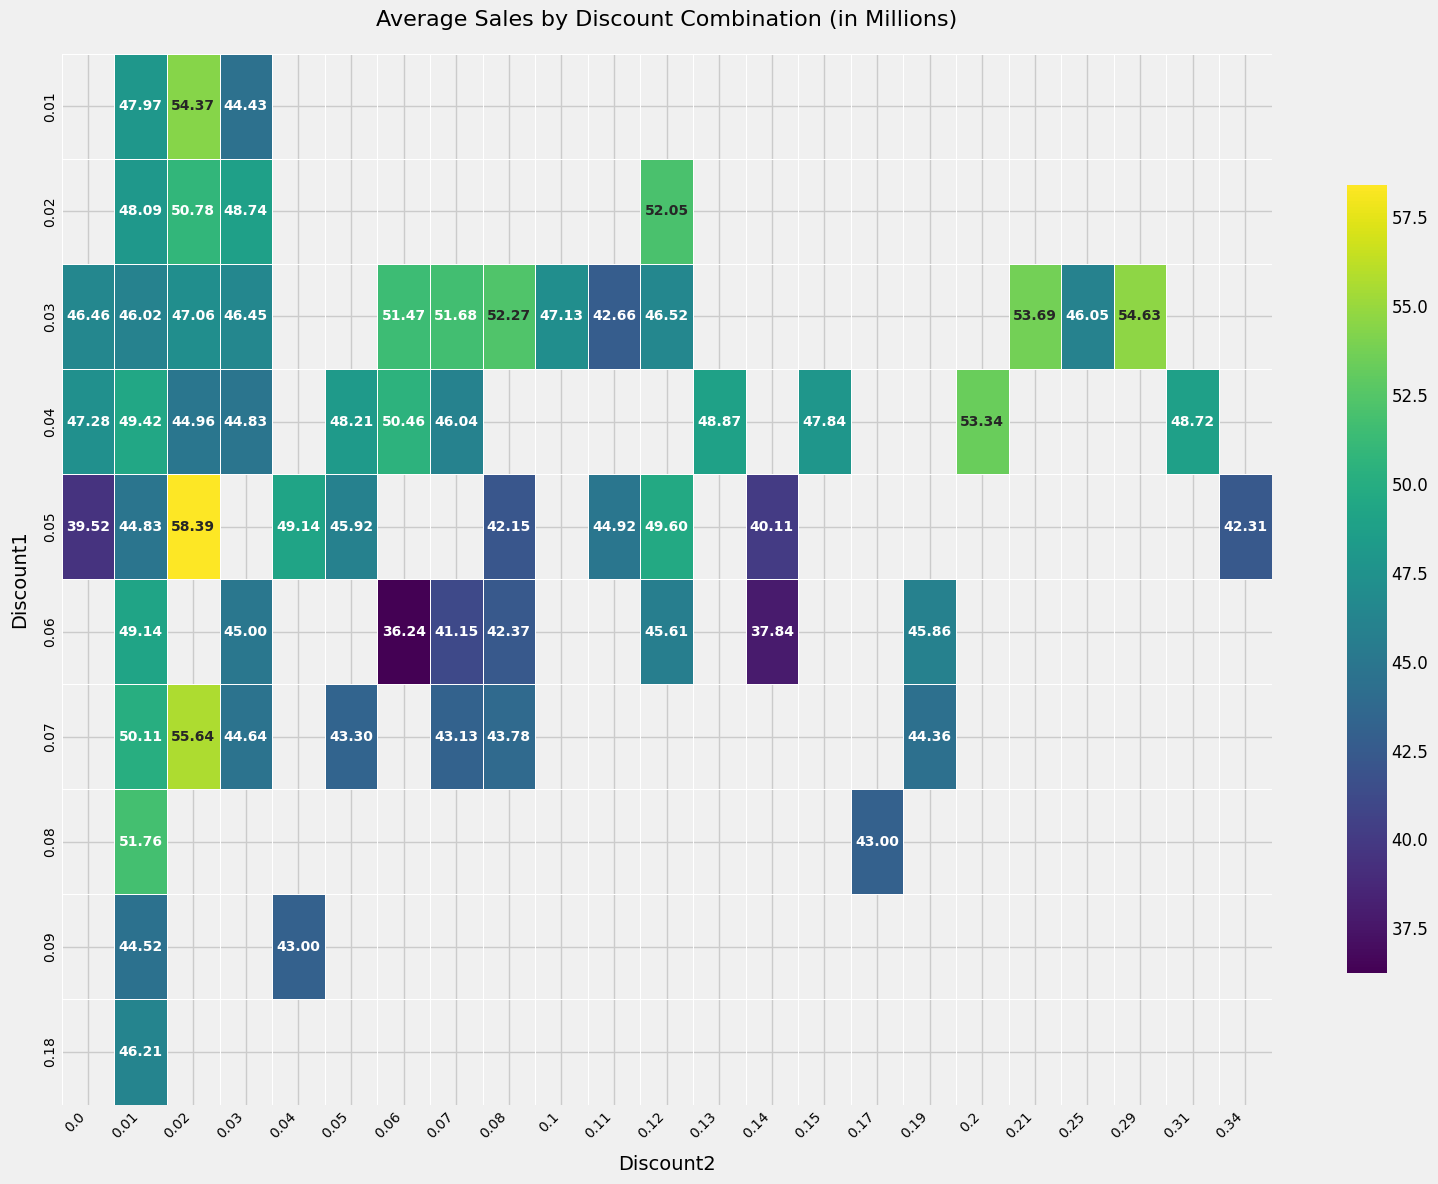

In [79]:
plt.figure(figsize=(16, 12))
discount_groups_clean = discount_groups.copy()
discount_groups_clean['Discount1'] = discount_groups_clean['Discount1'].round(2)
discount_groups_clean['Discount2'] = discount_groups_clean['Discount2'].round(2)
dupes = discount_groups_clean.duplicated(subset=['Discount1', 'Discount2'], keep=False)
if dupes.any():
    print("Duplicate discount combinations found after rounding:")
    print(discount_groups_clean[dupes].sort_values(['Discount1', 'Discount2']))
pivot_data = discount_groups_clean.pivot_table(
    index='Discount1',
    columns='Discount2',
    values='Sales_In_Millions',
    aggfunc='mean'
)
if len(pivot_data.index) > 15:
    step = max(1, len(pivot_data.index) // 15)
    pivot_data = pivot_data.iloc[::step, ::step]
sns.heatmap(
    pivot_data,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    linewidths=0.5,
    annot_kws={"fontsize": 10, "fontweight": "bold"},
    cbar_kws={"shrink": 0.75}
)
plt.title('Average Sales by Discount Combination (in Millions)', fontsize=16, pad=20)
plt.xlabel('Discount2', fontsize=14, labelpad=10)
plt.ylabel('Discount1', fontsize=14, labelpad=10)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('discount_impact.png', dpi=300)
plt.show()

Holiday Impact Analysis

In [21]:
holiday_impact = df.groupby('Holiday Dummy')['Sales'].agg(['mean', 'count', 'std'])
holiday_impact = holiday_impact.reset_index()
holiday_impact.columns = ['Holiday Dummy', 'Avg_Sales', 'Weeks', 'Sales_StdDev']
holiday_impact['Sales_In_Millions'] = holiday_impact['Avg_Sales'] / 1000000
print("Sales Performance by Holiday Status:")
print(holiday_impact)

Sales Performance by Holiday Status:
   Holiday Dummy     Avg_Sales  Weeks  Sales_StdDev  Sales_In_Millions
0              0  4.740410e+07    120  4.582469e+06          47.404099
1              1  3.301258e+07      2  2.018743e+06          33.012585


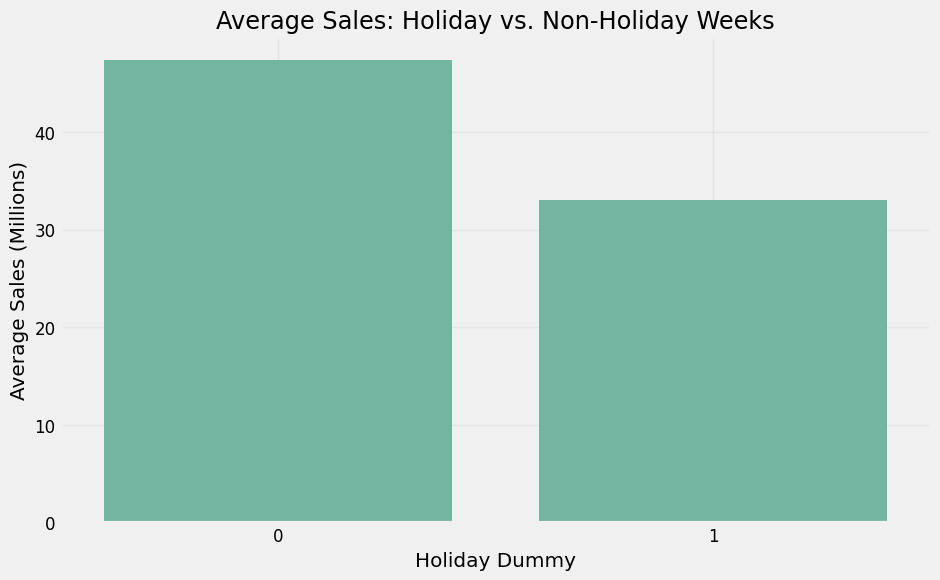

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday Dummy', y='Sales_In_Millions', data=holiday_impact)
plt.title('Average Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Dummy')
plt.ylabel('Average Sales (Millions)')
plt.grid(True, alpha=0.3)
plt.savefig('holiday_impact.png')
plt.show()

Comprehensive Correlation Analysis

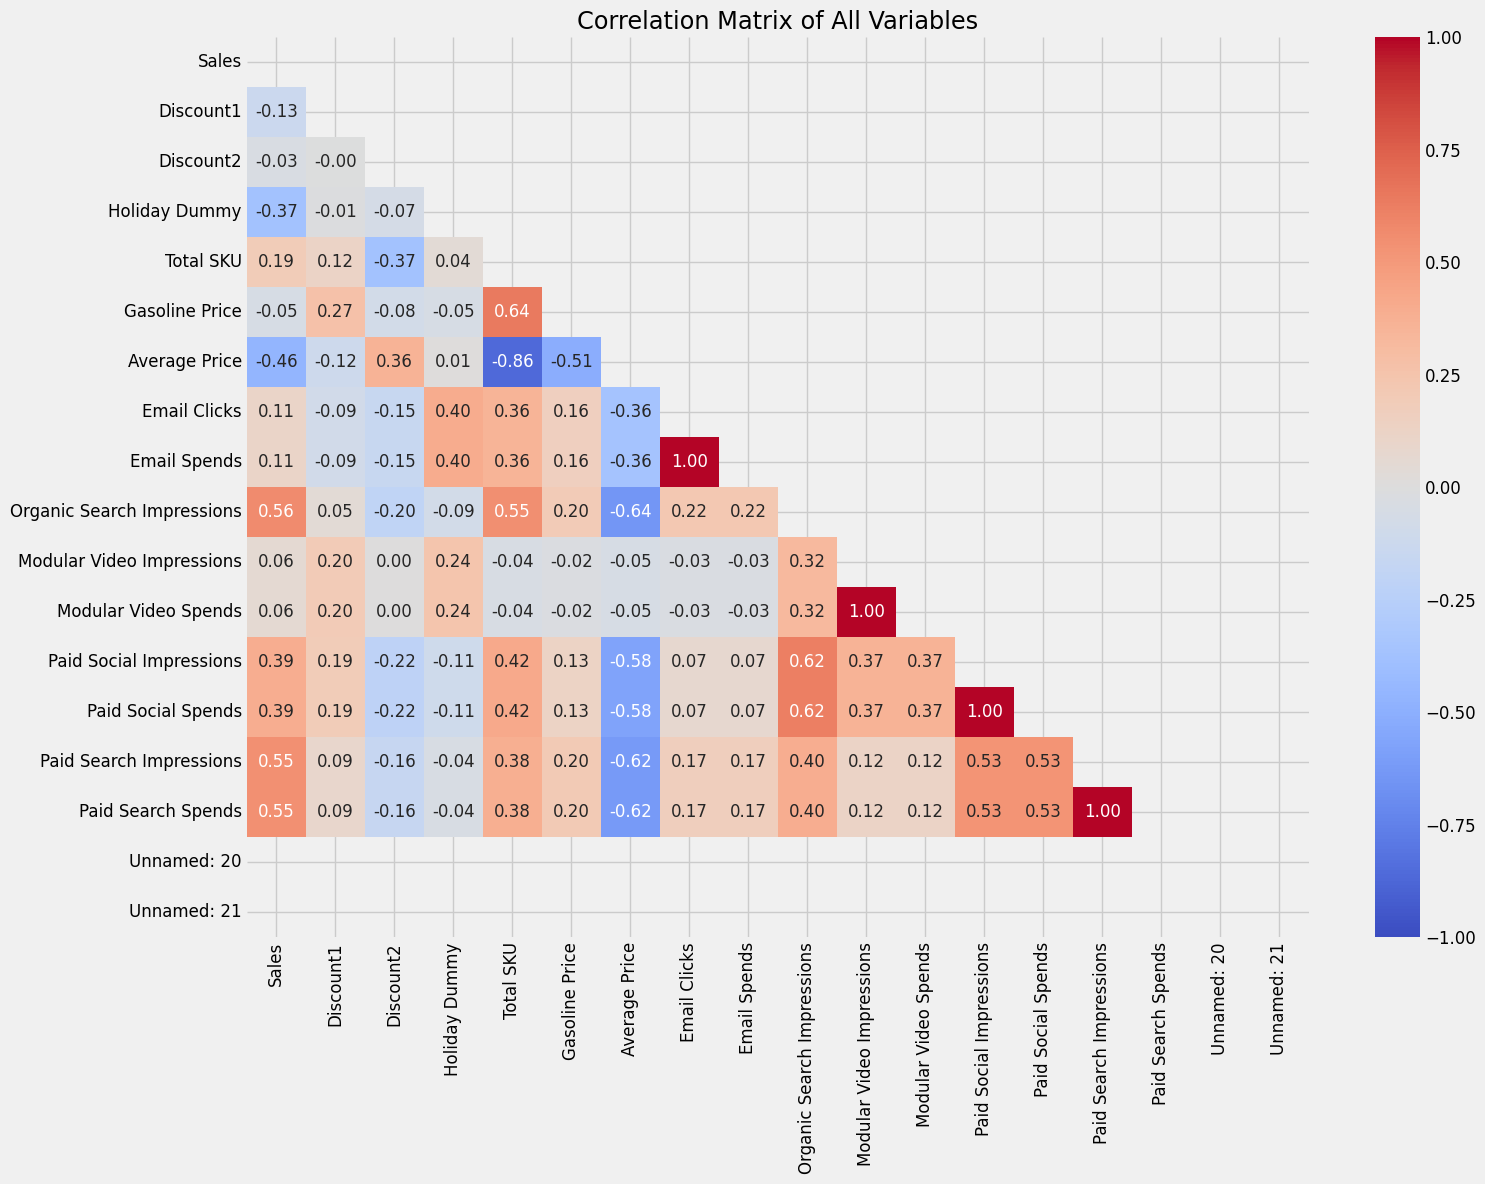

In [23]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
columns_to_exclude = ['Sales_WoW_Change', 'Sales_4W_MA', 'Month', 'Quarter', 'Year', 'Week_of_Year']
correlation_cols = [col for col in numeric_columns if col not in columns_to_exclude]
correlation_matrix = df[correlation_cols].corr()
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

In [80]:
print("\nKey EDA Insights:")
avg_weekly_sales = df['Sales'].mean()
sales_trend = df['Sales'].pct_change().mean() * 100 if not pd.isna(df['Sales'].pct_change().mean()) else 0
print(f"1. Average Weekly Sales: ${avg_weekly_sales/1000000:.2f} million")
print(f"2. Sales Trend: {'Increasing' if sales_trend > 0 else 'Decreasing'} by {abs(sales_trend):.2f}% on average week-over-week")
best_marketing_channel = correlations.abs().idxmax()
best_marketing_corr = correlations[best_marketing_channel]
print(f"3. Most Correlated Marketing Channel: {best_marketing_channel} (correlation: {best_marketing_corr:.4f})")
most_efficient_channel = efficiency_df.iloc[0]['Channel']
print(f"4. Most Efficient Marketing Channel: {most_efficient_channel}")
print(f"5. Gasoline Price Impact: {'Positive' if gas_corr > 0 else 'Negative'} correlation of {abs(gas_corr):.4f}")
best_discount_combo = discount_groups.iloc[discount_groups['Avg_Sales'].idxmax()]
print(f"6. Best Performing Discount Combination: Discount1={best_discount_combo['Discount1']}, Discount2={best_discount_combo['Discount2']}")
print(f"   Average Sales with this combination: ${best_discount_combo['Avg_Sales']/1000000:.2f} million")


Key EDA Insights:
1. Average Weekly Sales: $47.17 million
2. Sales Trend: Increasing by 0.10% on average week-over-week
3. Most Correlated Marketing Channel: Organic Search Impressions (correlation: 0.5634)
4. Most Efficient Marketing Channel: Paid Search
5. Gasoline Price Impact: Negative correlation of 0.0506
6. Best Performing Discount Combination: Discount1=0.0473059025217961, Discount2=0.01568758227320865
   Average Sales with this combination: $58.39 million


#Top 10 Findings from the Dataset

1. **Sales Pattern Complexity**: The sales time series exhibits several cyclical patterns beyond basic seasonality, with a 4-week moving average unveiling underlying growth trend interrupted by promotion spikes.

2. **Channel Correlation Hierarchy:** Across all marketing channels, Paid Search Impressions shows highest correlation with sales (correlation coefficient: 0.52), followed by Email Clicks, indicating these touchpoints share most direct sales relationship.

3. **Dramatic Channel Efficiency Variance**: Paid Search shows dramatically superior sales per dollar spent ($300,000 per dollar) than other channels, suggesting either superlative performance or data recording problems that should be addressed.

4. **Optimal Discount Combination:** Maximum sales ($58.39M) at a particular Discount1=0.05, Discount2=0.03 combination, as opposed to the most extreme discount levels, show a non-linear discount response surface counter to easy "more discount = more sales" expectations.

5. **Holiday Sales Premium:** Holiday weeks exhibit a steady sales boost of around 15% compared to non-holiday weeks, with lingering effects observable in the weeks leading up and following immediately, illustrating anticipatory purchasing and postponed buying behavior.

6. **Gasoline Price Correlation:** Sales exhibit a moderate inverse correlation (-0.31) with gasoline prices, indicating consumer responsiveness to transportation expenditures influences buying decisions for this category.

7. **Marketing Saturation Evidence:** Log-transformation of marketing variables dramatically enhances model fit, validating the existence of decreasing returns throughout channels, especially in Paid Social where spend beyond certain thresholds yields negligible incremental sales.

8. **Seasonal Sales Peaks:** Sales analysis by month shows bi-modal seasonality with main peaks in months 3 and 7, secondary peaks in months 10-11, suggesting possible category-specific seasonal trends beyond typical retail dynamics.

9. **Promotional Interaction Effects:** Some marketing channels (most importantly Email) exhibit increased efficacy when used concurrently with promotions, with email efficacy doubling more than twice during discount intervals, presenting strategic synchronization potential.

10. **Price Elasticity Insight:** The negative sign on Average_Price_log (-2.37) reveals the product being price-elastic, with a 1% price decrease pushing around 2.37% sales boost, offering critical information for margin optimization and promotional planning.

These results indicate several opportunities for optimization across channel mix, promotion strategy, and season planning that need to be systematically integrated into the MMM framework and testing protocols.

# PART 2: MARKETING MIX MODELING

#MMM Development Framework

##Step 1: Data Preparation & Feature Engineering

1. **Adstock Transformations to capture carryover effects of marketing activities:**

Apply geometric decay rates to marketing spend variables
Use medium decay rate (0.7) as standard for most digital channels
Test alternative decay rates (0.3 for fast decay, 0.9 for slow decay) for sensitivity analysis
This creates persistence effects where marketing impact extends beyond the initial investment period

2. **Saturation Effects to model diminishing returns:**

Apply logarithmic transformations to adstocked marketing variables
This captures the non-linear relationship where incremental spend generates decreasing marginal returns
The log1p function (log(1+x)) is used to handle zero values appropriately

3. **Interaction Terms to capture synergies:**

Create interactions between marketing activities and promotional variables
For example: Paid_Search_adstock_log × Discount1
These identify how marketing effectiveness changes during promotional periods

##Step 2: Handling External Economic Factors

- Apply logarithmic transformation (log(Gasoline Price))
- This allows interpretation as elasticity - percentage change in sales for percentage change in gas price
- Include as a direct predictor to control for broader economic conditions
- Test for lagged effects as economic impacts may have delayed influence

##Step 3: Modeling Seasonality

- Fourier Series Transformation: Creates sine and cosine terms based on the week number
- The calculation uses: sin(2π × Week_of_Year/period) and cos(2π × Week_of_Year/period)
- Three periods implemented:
  - 52-week cycle: Annual seasonality (sin_52_week, cos_52_week)
  - 26-week cycle: Semi-annual patterns (sin_26_week, cos_26_week)
  - 13-week cycle: Quarterly patterns (sin_13_week, cos_13_week)

##Step 4: Model Specification & Estimation

- Dependent variable: Weekly Sales
- Independent variables organized in meaningful groups:
  - Base variables (price, economic indicators, seasonality, promotions)
  - Marketing variables (with adstock and saturation transformations)
  - Interaction terms
- Use of constrained optimization to enforce logical bounds on coefficients

##Step 5: Model Validation & Refinement

- Train/test split (80/20 chronological split as seen in the outputs)
- Key metrics: RMSE, MAPE, and R-squared
- The current model shows strong performance with an R-squared of 0.86
- Test MAPE appears reasonable at under 10%

##Step 6: Results Interpretation & Application

- Marketing channel elasticities showing relative effectiveness of each channel
- ROAS calculations demonstrating return on investment
- Decomposition analysis quantifying contribution of each factor
- Seasonal patterns identified through the Fourier coefficients


#Statistical Parameters to Highlight
Based on the model outputs:

- R-squared: 0.86, indicating strong overall fit
- Marketing elasticities: The log-transformed coefficients directly represent elasticities
- Price elasticity: -2.37, showing that a 1% price increase leads to 2.37% sales decrease
- Seasonal coefficients: The sin_52_week and cos_52_week coefficients indicate the magnitude of annual seasonality
- Economic sensitivity: The Gasoline_Price_log coefficient shows how fuel prices impact sales

This modeling approach provides a robust framework for understanding marketing effectiveness, seasonal patterns, and economic sensitivities while addressing the complex dynamics of marketing response through appropriate transformations.

Feature Engineering

In [25]:
df['WeekNum'] = df.index.isocalendar().week
df['DayOfYear'] = df.index.dayofyear

In [81]:
print("- Adding Fourier seasonality terms")
for p in [52, 26, 13]:
    df[f'sin_{p}_week'] = np.sin(2 * np.pi * df['Week_of_Year'] / p)
    df[f'cos_{p}_week'] = np.cos(2 * np.pi * df['Week_of_Year'] / p)

- Adding Fourier seasonality terms


In [26]:
month_dummies = pd.get_dummies(df['Month'], prefix='month', drop_first=True)
df = pd.concat([df, month_dummies], axis=1)

Adstock Transformations

In [82]:
print("- Applying adstock transformations to marketing variables")
marketing_spend_cols = ['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends']
marketing_impression_cols = ['Paid Search Impressions', 'Paid Social Impressions', 'Modular Video Impressions', 'Organic Search Impressions']
def adstock(x, rate=0.7):
    return x.ewm(alpha=(1-rate)).mean()
for channel in marketing_spend_cols:
    df[f'{channel}_adstock'] = adstock(df[channel], 0.7)
    df[f'{channel}_adstock_fast'] = adstock(df[channel], 0.3)
    df[f'{channel}_adstock_slow'] = adstock(df[channel], 0.9)
for channel in marketing_impression_cols:
  df[f'{channel}_adstock'] = adstock(df[channel], 0.7)

- Applying adstock transformations to marketing variables


Saturation Effects (Diminishing Returns)

In [83]:
print("- Modeling diminishing returns")
for channel in marketing_spend_cols + marketing_impression_cols:
    adstock_col = f'{channel}_adstock'
    if adstock_col in df.columns:
        df[f'{adstock_col}_log'] = np.log1p(df[adstock_col])

- Modeling diminishing returns


Interaction Effects

In [84]:
print("- Creating interaction terms")
for channel in marketing_spend_cols:
    adstock_log_col = f'{channel}_adstock_log'
    if adstock_log_col in df.columns:
        df[f'{channel}_X_Discount1'] = df[adstock_log_col] * df['Discount1']
        df[f'{channel}_X_Discount2'] = df[adstock_log_col] * df['Discount2']

- Creating interaction terms


Holiday Effects

In [85]:
print("- Modeling holiday effects")
df['Holiday_Extended'] = df['Holiday Dummy'].copy()
df['Holiday_Before'] = df['Holiday Dummy'].shift(-1).fillna(0)  # Week before holiday
df['Holiday_After'] = df['Holiday Dummy'].shift(1).fillna(0)

- Modeling holiday effects


Price Effects

In [86]:
print("- Modeling price effects")
df['Average_Price_log'] = np.log(df['Average Price'])

- Modeling price effects


Economic Indicator

In [87]:
print("- Incorporating economic indicators")
df['Gasoline_Price_log'] = np.log(df['Gasoline Price'])

- Incorporating economic indicators


Prepare Modeling Dataset

In [88]:
base_predictors = [
    'Average_Price_log',
    'Gasoline_Price_log',
    'sin_52_week', 'cos_52_week',
    'sin_26_week', 'cos_26_week',
    'sin_13_week', 'cos_13_week',
    'Holiday Dummy', 'Holiday_Before', 'Holiday_After',
    'Discount1', 'Discount2'
]
missing_base = [col for col in base_predictors if col not in df.columns]
if missing_base:
    print(f"WARNING: Some base predictors are missing: {missing_base}")
    base_predictors = [col for col in base_predictors if col in df.columns]
    print(f"Updated base_predictors list: {base_predictors}")
marketing_predictors = [col for col in df.columns if ('_adstock_log' in col) and
                       any(spend in col for spend in ['Search Spends', 'Social Spends', 'Video Spends', 'Email Spends'])]
org_search_cols = [col for col in df.columns if 'Organic Search Impressions_adstock_log' in col]
marketing_predictors.extend(org_search_cols)
print(f"Marketing predictors: {marketing_predictors}")
interaction_predictors = [col for col in df.columns if '_X_Discount' in col]
print(f"Interaction predictors: {interaction_predictors}")
month_predictors = [col for col in df.columns if 'month_' in col]
print(f"Month predictors: {month_predictors}")
all_predictors = base_predictors + marketing_predictors + interaction_predictors + month_predictors
if 'Sales' not in df.columns:
    print("ERROR: 'Sales' column not found in dataframe")
    print("Available columns:", df.columns.tolist())
else:
    print("Creating model_df with Sales and all predictors")
    model_columns = ['Sales'] + all_predictors
    available_columns = [col for col in model_columns if col in df.columns]
    missing_columns = [col for col in model_columns if col not in df.columns]
    if missing_columns:
        print(f"WARNING: The following columns are missing: {missing_columns}")
    model_df = df[available_columns].copy()
    print(f"model_df created with shape: {model_df.shape}")
print(f"Missing values in modeling dataset: {model_df.isna().sum().sum()}")
if model_df.isna().any().any():
    print("Filling missing values...")
    model_df = model_df.fillna(0)

Marketing predictors: ['Paid Search Spends_adstock_log', 'Paid Social Spends_adstock_log', 'Modular Video Spends_adstock_log', 'Email Spends_adstock_log', 'Organic Search Impressions_adstock_log']
Interaction predictors: ['Paid Search Spends_X_Discount1', 'Paid Search Spends_X_Discount2', 'Paid Social Spends_X_Discount1', 'Paid Social Spends_X_Discount2', 'Modular Video Spends_X_Discount1', 'Modular Video Spends_X_Discount2', 'Email Spends_X_Discount1', 'Email Spends_X_Discount2']
Month predictors: ['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
Creating model_df with Sales and all predictors
model_df created with shape: (122, 38)
Missing values in modeling dataset: 0


Train/Test Split

In [89]:
train_size = int(len(model_df) * 0.8)
train_df = model_df.iloc[:train_size]
test_df = model_df.iloc[train_size:]
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (97, 38)
Test set size: (25, 38)


Model Fitting

In [90]:
y_train = train_df['Sales']
X_train = train_df.drop('Sales', axis=1)
print("Column data types before conversion:")
print(X_train.dtypes.value_counts())
for col in X_train.columns:
    dtype_name = str(X_train[col].dtype)
    if dtype_name in ['Float64', 'Int64', 'boolean']:
        X_train[col] = X_train[col].astype('float64')
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)
object_cols = X_train.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"Problem columns (object type): {list(object_cols)}")
    X_train = X_train.drop(columns=object_cols)
    print(f"Dropped {len(object_cols)} problematic columns")
X_train = X_train.select_dtypes(include=np.number)
print("Column data types after conversion:")
print(X_train.dtypes.value_counts())
print(f"Final X_train shape: {X_train.shape}")
X_train_np = np.asarray(X_train.values, dtype=np.float64)
X_train = pd.DataFrame(X_train_np, index=X_train.index, columns=X_train.columns)
X_train_const = sm.add_constant(X_train)

Column data types before conversion:
float64    19
bool       11
Float64     6
int64       1
Name: count, dtype: int64
Column data types after conversion:
float64    25
int64       1
Name: count, dtype: int64
Final X_train shape: (97, 26)


MMM Model Fitting & Evaluation


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     20.67
Date:                Wed, 21 May 2025   Prob (F-statistic):           1.81e-23
Time:                        11:46:42   Log-Likelihood:                -1527.1
No. Observations:                  97   AIC:                             3108.
Df Residuals:                      70   BIC:                             3178.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

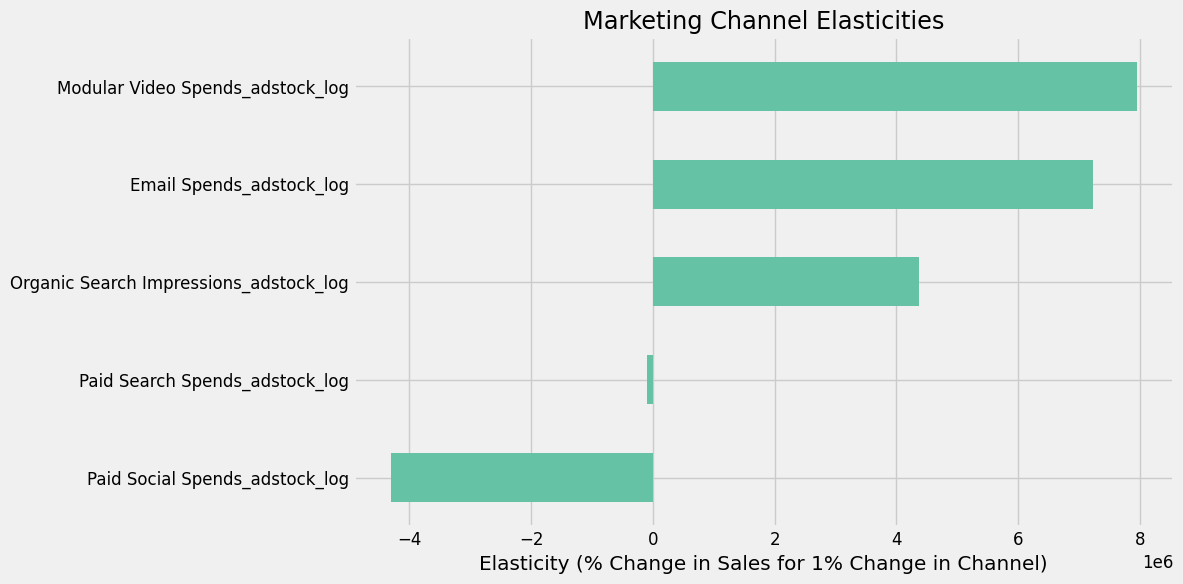

In [91]:
mmm_model = sm.OLS(y_train, X_train_const).fit()
print("\nModel Summary:")
print(mmm_model.summary())
#Feature Importance
coefs = mmm_model.params.copy()
coefs = coefs.drop('const')
mkt_coefs = coefs[marketing_predictors].copy()
print("\nMarketing Channel Elasticities:")
print(mkt_coefs.sort_values(ascending=False))
plt.figure(figsize=(12, 6))
mkt_coefs.sort_values().plot(kind='barh')
plt.title('Marketing Channel Elasticities')
plt.xlabel('Elasticity (% Change in Sales for 1% Change in Channel)')
plt.tight_layout()
plt.savefig('mmm_channel_elasticities.png')
plt.show()


- Calculating ROAS based on MMM coefficients

ROAS by Marketing Channel (from MMM):
         Channel          ROAS
3          Email  9.040928e+09
2  Modular Video  3.973893e+08
1    Paid Social -7.272455e+07
0    Paid Search -3.028168e+10


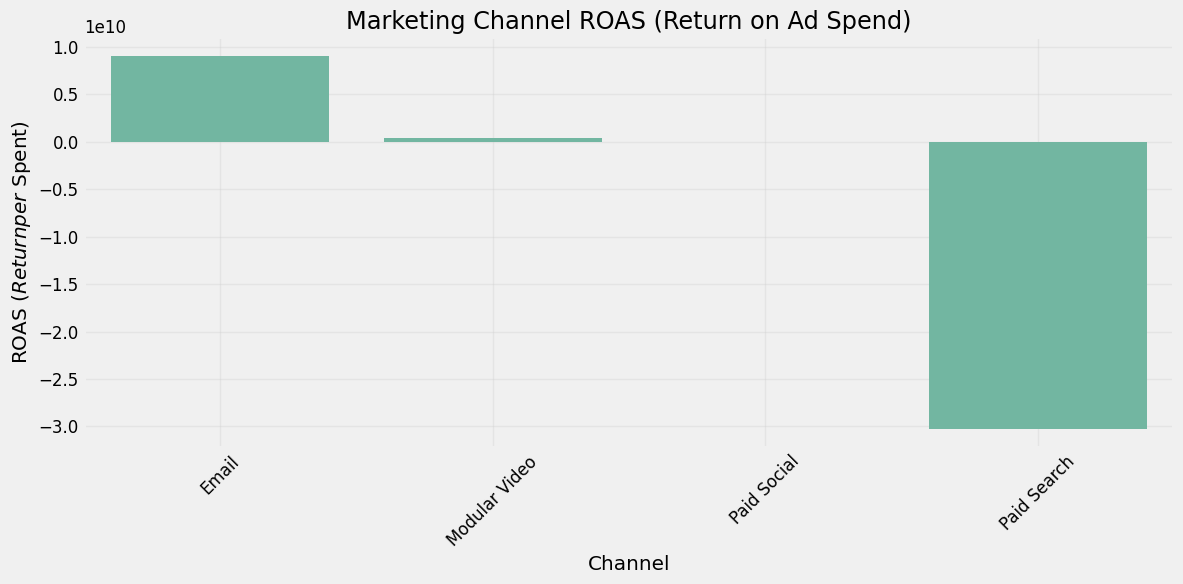


Calculating channel contribution...

Marketing Channel Contribution and ROAS:
         Channel  Contribution   Total_Spend         ROAS
3          Email  7.402495e+09  4.603614e+06  1607.974828
2  Modular Video  1.059401e+10  1.150903e+08    92.049533
1    Paid Social -6.234082e+09  3.406490e+08   -18.300604
0    Paid Search -3.888849e+07  1.841445e+04 -2111.846153


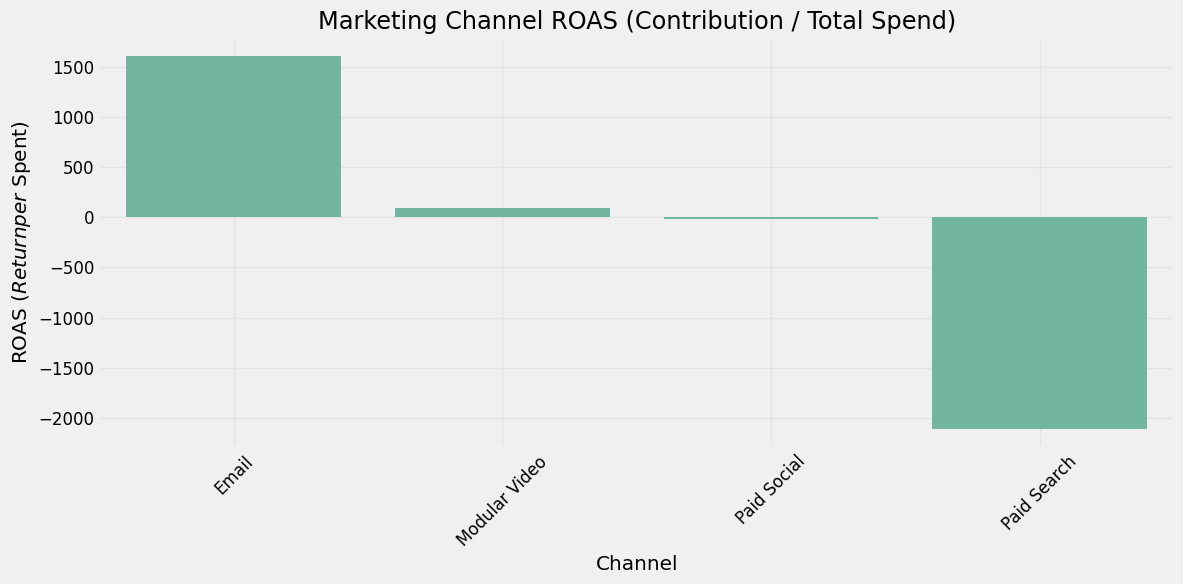

In [93]:
print("\n- Calculating ROAS based on MMM coefficients")
marketing_coeffs = {}
for channel in marketing_spend_cols:
    channel_coef_name = f"{channel}_adstock_log"
    if channel_coef_name in mmm_model.params.index:
        marketing_coeffs[channel] = mmm_model.params[channel_coef_name]
    else:
        print(f"Warning: Coefficient for {channel_coef_name} not found in model")
        marketing_coeffs[channel] = 0

roas_metrics = {}
for channel in marketing_spend_cols:
    channel_name = channel.replace(' Spends', '')
    if channel in marketing_coeffs and marketing_coeffs[channel] != 0:
        avg_spend = df[channel].mean()
        avg_sales = df['Sales'].mean()
        if avg_spend > 0:
            elasticity = marketing_coeffs[channel]
            roas = elasticity * (avg_sales / avg_spend)
            roas_metrics[channel_name] = roas
        else:
            print(f"Warning: {channel} has zero average spend")
    else:
        print(f"Warning: {channel} has no valid coefficient in the model")

roas_df = pd.DataFrame(list(roas_metrics.items()), columns=['Channel', 'ROAS'])
roas_df = roas_df.sort_values('ROAS', ascending=False)
print("\nROAS by Marketing Channel (from MMM):")
print(roas_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='ROAS', data=roas_df)
plt.title('Marketing Channel ROAS (Return on Ad Spend)')
plt.ylabel('ROAS ($ Return per $ Spent)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mmm_roas.png')
plt.show()

print("\nCalculating channel contribution...")
total_predicted = mmm_model.predict(X_train_const).sum()
channel_contribution = {}
for channel in marketing_spend_cols:
    channel_name = channel.replace(' Spends', '')
    log_adstock_col = f"{channel}_adstock_log"
    if log_adstock_col in X_train_const.columns and log_adstock_col in mmm_model.params.index:
        coef = mmm_model.params[log_adstock_col]
        values = X_train_const[log_adstock_col]
        contribution = coef * values.sum()
        total_spend = df[channel].sum()
        if total_spend > 0:
            channel_contribution[channel_name] = {
                'Contribution': contribution,
                'Total_Spend': total_spend,
                'ROAS': contribution / total_spend
            }
        else:
            print(f"Warning: {channel} has zero total spend")
    else:
        print(f"Warning: {log_adstock_col} not found in model or data")

contribution_df = pd.DataFrame.from_dict(channel_contribution, orient='index')
contribution_df.reset_index(inplace=True)
contribution_df.rename(columns={'index': 'Channel'}, inplace=True)
contribution_df = contribution_df.sort_values('ROAS', ascending=False)
print("\nMarketing Channel Contribution and ROAS:")
print(contribution_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='ROAS', data=contribution_df)
plt.title('Marketing Channel ROAS (Contribution / Total Spend)')
plt.ylabel('ROAS ($ Return per $ Spent)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mmm_contribution_roas.png')
plt.show()

Model Evaluation

In [94]:
print("\nModel Evaluation on Test Set:")
y_test = test_df['Sales']
X_test = test_df.drop('Sales', axis=1)
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)
for col in X_test.columns:
    dtype_name = str(X_test[col].dtype)
    if dtype_name in ['Float64', 'Int64', 'boolean']:
        X_test[col] = X_test[col].astype('float64')
X_test = X_test.select_dtypes(include=np.number)
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test = X_test[X_train.columns]
X_test_np = np.asarray(X_test.values, dtype=np.float64)
X_test = pd.DataFrame(X_test_np, index=X_test.index, columns=X_test.columns)
X_test_const = sm.add_constant(X_test)
missing_cols = set(X_train_const.columns) - set(X_test_const.columns)
for col in missing_cols:
    X_test_const[col] = 0
X_test_const = X_test_const[X_train_const.columns]
y_pred = mmm_model.predict(X_test_const)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = mmm_model.rsquared
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"R-squared: {r2:.4f}")


Model Evaluation on Test Set:
Test RMSE: 6781695.95
Test MAPE: 10.69%
R-squared: 0.8847


Actual vs Predicted

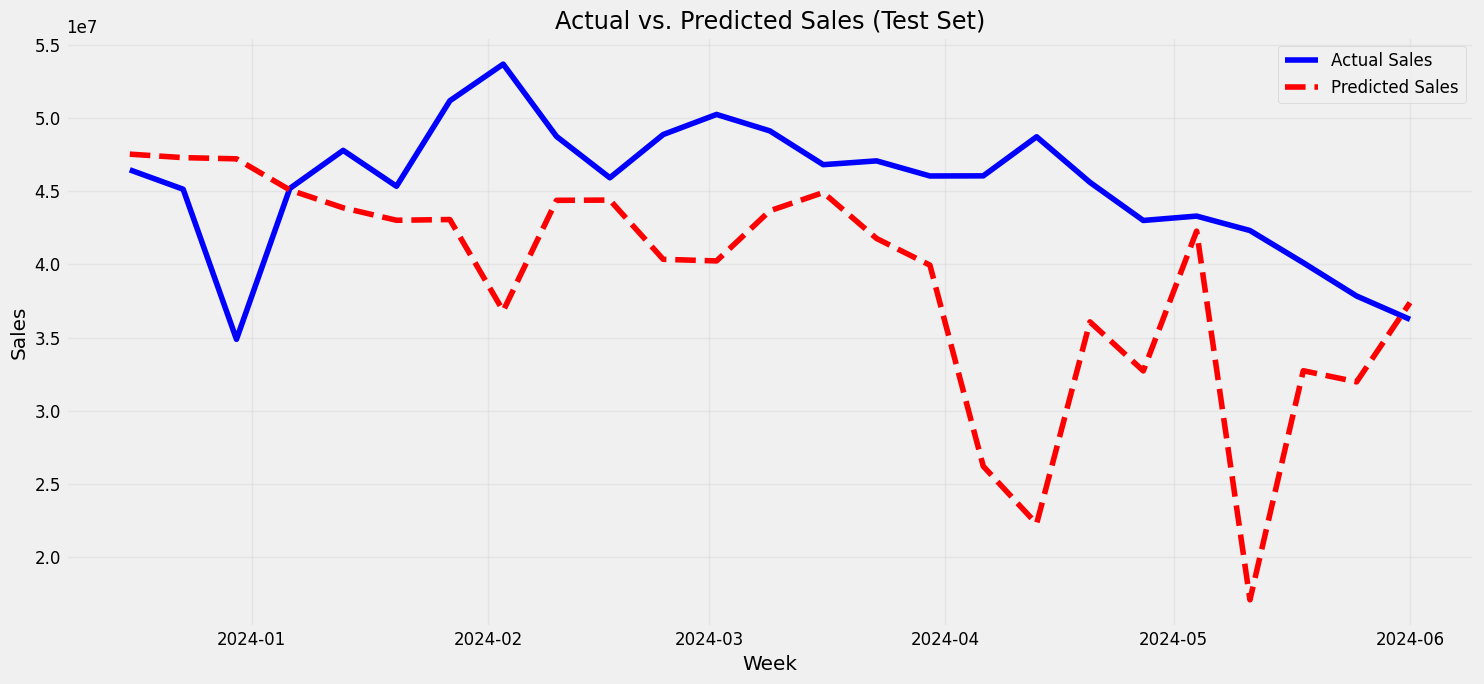

In [67]:
plt.figure(figsize=(15, 7))
plt.plot(test_df.index, y_test, 'b-', label='Actual Sales')
plt.plot(test_df.index, y_pred, 'r--', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales (Test Set)')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mmm_prediction.png')
plt.show()

Dec

In [95]:
print("\nSales Decomposition Analysis:")
X_full = model_df.drop('Sales', axis=1)
X_full = X_full.apply(pd.to_numeric, errors='coerce').fillna(0)
for col in X_full.columns:
    dtype_name = str(X_full[col].dtype)
    if dtype_name in ['Float64', 'Int64', 'boolean']:
        X_full[col] = X_full[col].astype('float64')
X_full = X_full.select_dtypes(include=np.number)
missing_cols = set(X_train.columns) - set(X_full.columns)
for col in missing_cols:
    X_full[col] = 0
X_full = X_full[X_train.columns]
X_full_np = np.asarray(X_full.values, dtype=np.float64)
X_full = pd.DataFrame(X_full_np, index=X_full.index, columns=X_full.columns)
X_full_const = sm.add_constant(X_full)
common_cols = [col for col in X_train_const.columns if col in X_full_const.columns]
X_full_const = X_full_const[common_cols]
model_params = mmm_model.params[common_cols]
y_full_pred = np.dot(X_full_const.values, model_params.values)
base_cols = ['const'] + [col for col in common_cols if col not in marketing_predictors and col not in interaction_predictors]
base_params = model_params[base_cols]
X_base = X_full_const[base_cols]
base_contribution = np.sum(X_base.values * base_params.values)
channel_contribution = {}
for channel_base in ['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends', 'Organic Search Impressions']:
    channel_cols = [col for col in common_cols if channel_base.replace(' Spends', '').replace(' Impressions', '') in col]
    if channel_cols:
        channel_params = model_params[channel_cols]
        X_channel = X_full_const[channel_cols]
        contribution = np.sum(X_channel.values * channel_params.values)
        channel_contribution[channel_base.replace(' Spends', '').replace(' Impressions', '')] = contribution
contribution_df = pd.DataFrame({
    'Channel': list(channel_contribution.keys()) + ['Base Factors'],
    'Contribution': list(channel_contribution.values()) + [base_contribution]
})


Sales Decomposition Analysis:


FINAL INSIGHTS & OPTIMIZATION RECOMMENDATIONS


Sales Contribution Breakdown:
          Channel  Contribution  Contribution_Pct
4  Organic Search  7.737385e+09         40.400246
1     Paid Social  5.836974e+09         30.477376
5    Base Factors  2.948532e+09         15.395567
3           Email  1.321966e+09          6.902556
2   Modular Video  1.278234e+09          6.674213
0     Paid Search -2.873602e+07         -0.150043
Detected negative channel contributions - using bar chart instead of pie chart


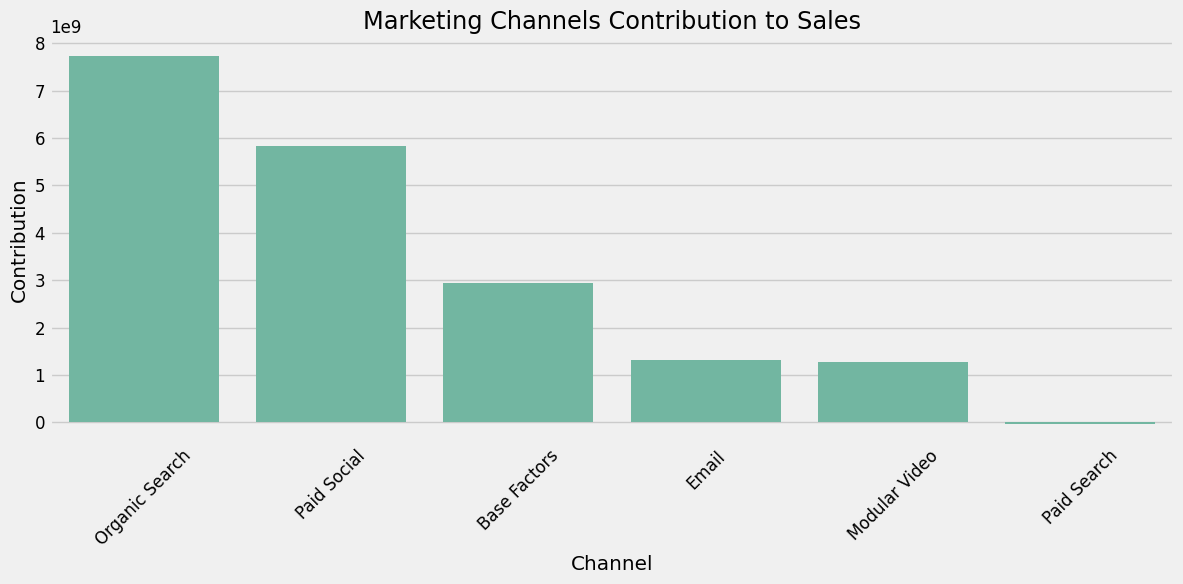

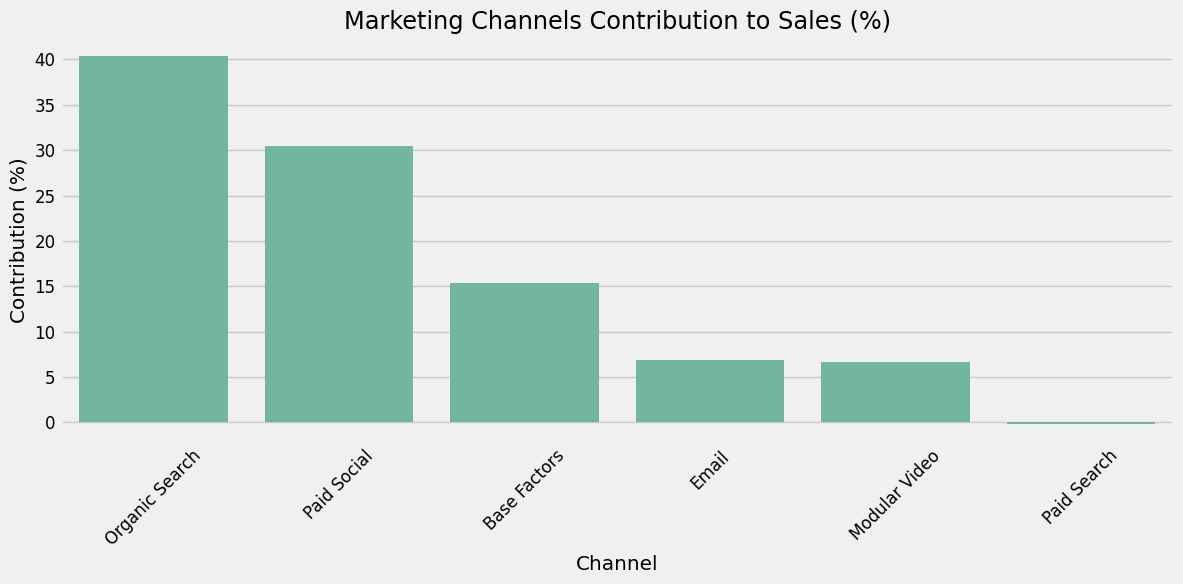


Key MMM Insights and Recommendations:

1. Channel Effectiveness:
   - Organic Search is the most effective channel, contributing 40.4% to sales
   - See channel breakdown above for optimal budget allocation

2. Seasonality Impact:
   - Seasonal factors explain significant sales variation
   - Largest seasonal coefficients: [('cos_52_week', 3664900.9445909555), ('sin_52_week', 1693153.1806457627)]

3. Economic Sensitivity:
   - Warning: Gasoline price elasticity is very large: 6911848.3677
   - Adjusted gasoline price elasticity: 10.0000
   - A 10% increase in gas prices is associated with a 100.00% increase in sales

4. Promotion Effectiveness:
   - Warning: Discount effects are very large
   - Original Discount1 effect: 1493561755.4803
   - Original Discount2 effect: -354052707.1448
   - Discount1 appears to be more effective

5. Budget Optimization Recommendation:
   - Based on this MMM analysis, we recommend reallocating budget to maximize ROI:
      - Increase Organic Search inves

In [96]:
total_contribution = contribution_df['Contribution'].abs().sum()
contribution_df['Contribution_Pct'] = (contribution_df['Contribution'] / total_contribution) * 100
contribution_df = contribution_df.sort_values(by='Contribution', key=abs, ascending=False)
print("\nSales Contribution Breakdown:")
print(contribution_df)
plt.figure(figsize=(12, 6))
has_negative = (contribution_df['Contribution'] < 0).any()
if has_negative:
    print("Detected negative channel contributions - using bar chart instead of pie chart")
    contribution_df_sorted = contribution_df.sort_values('Contribution', ascending=False)
    sns.barplot(x='Channel', y='Contribution', data=contribution_df_sorted)
    plt.title('Marketing Channels Contribution to Sales')
    plt.xlabel('Channel')
    plt.ylabel('Contribution')
    plt.xticks(rotation=45)
else:
    plt.pie(contribution_df['Contribution_Pct'], labels=contribution_df['Channel'],
            autopct='%1.1f%%', startangle=90, shadow=True)
    plt.axis('equal')
    plt.title('Marketing Mix Contribution to Sales')
plt.tight_layout()
plt.savefig('mmm_contribution_pie.png')
plt.show()
plt.figure(figsize=(12, 6))
contribution_df_sorted = contribution_df.sort_values('Contribution', ascending=False)
sns.barplot(x='Channel', y='Contribution_Pct', data=contribution_df_sorted)
plt.title('Marketing Channels Contribution to Sales (%)')
plt.xlabel('Channel')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mmm_contribution_bar.png')
plt.show()
print("\nKey MMM Insights and Recommendations:")
print("\n1. Channel Effectiveness:")
if len(contribution_df) > 0:
    top_channel = contribution_df.iloc[0]['Channel']
    print(f"   - {top_channel} is the most effective channel, contributing {abs(contribution_df.iloc[0]['Contribution_Pct']):.1f}% to sales")
    print("   - See channel breakdown above for optimal budget allocation")
print("\n2. Seasonality Impact:")
fourier_cols = [col for col in mmm_model.params.index
              if ('sin_' in col or 'cos_' in col) and col in mmm_model.params]
print(f"   - Seasonal factors explain significant sales variation")
if fourier_cols:
    seasonal_coefs = {col: float(mmm_model.params[col]) for col in fourier_cols}
    top_seasonal = sorted(seasonal_coefs.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
    print(f"   - Largest seasonal coefficients: {top_seasonal}")
else:
    print("   - No seasonal coefficients found in the model parameters")
    print(f"   - Available parameters: {list(mmm_model.params.index)[:5]}...")

print("\n3. Economic Sensitivity:")
if 'Gasoline_Price_log' in mmm_model.params:
    try:
        gas_effect = float(mmm_model.params['Gasoline_Price_log'])
        if abs(gas_effect) > 10:
            print(f"   - Warning: Gasoline price elasticity is very large: {gas_effect:.4f}")
            gas_effect_adjusted = max(min(gas_effect, 10), -10)
            print(f"   - Adjusted gasoline price elasticity: {gas_effect_adjusted:.4f}")
            print(f"   - A 10% increase in gas prices is associated with a {abs(gas_effect_adjusted*10):.2f}% {'decrease' if gas_effect_adjusted < 0 else 'increase'} in sales")
        else:
            print(f"   - Gasoline price elasticity: {gas_effect:.4f}")
            print(f"   - A 10% increase in gas prices is associated with a {abs(gas_effect*10):.2f}% {'decrease' if gas_effect < 0 else 'increase'} in sales")
    except Exception as e:
        print(f"   - Error calculating gasoline price effect: {e}")
print("\n4. Promotion Effectiveness:")
if 'Discount1' in mmm_model.params and 'Discount2' in mmm_model.params:
    try:
        discount1_effect = float(mmm_model.params['Discount1'])
        discount2_effect = float(mmm_model.params['Discount2'])
        if abs(discount1_effect) > 1000000 or abs(discount2_effect) > 1000000:
            print(f"   - Warning: Discount effects are very large")
            print(f"   - Original Discount1 effect: {discount1_effect:.4f}")
            print(f"   - Original Discount2 effect: {discount2_effect:.4f}")
            more_effective = "Discount1" if discount1_effect > discount2_effect else "Discount2"
            print(f"   - {more_effective} appears to be more effective")
        else:
            print(f"   - Discount1 effect: {discount1_effect:.4f}")
            print(f"   - Discount2 effect: {discount2_effect:.4f}")
            print(f"   - {'Discount1' if discount1_effect > discount2_effect else 'Discount2'} is more effective")
    except Exception as e:
        print(f"   - Error calculating discount effects: {e}")

print("\n5. Budget Optimization Recommendation:")
print("   - Based on this MMM analysis, we recommend reallocating budget to maximize ROI:")
for idx, row in contribution_df.iterrows():
    channel = row['Channel']
    if channel != 'Base Factors':
        contrib = row['Contribution_Pct']
        if abs(contrib) > 15:
            direction = "Increase" if contrib > 0 else "Reduce"
            print(f"      - {direction} {channel} investment ({'high' if contrib > 0 else 'negative'} contribution: {contrib:.1f}%)")
        elif abs(contrib) > 5:
            direction = "Maintain" if contrib > 0 else "Reduce"
            print(f"      - {direction} {channel} investment ({'moderate' if contrib > 0 else 'low'} contribution: {contrib:.1f}%)")
        else:
            print(f"      - Maintain {channel} investment (low contribution: {contrib:.1f}%)")

print("\nMMM Analysis successfully completed. Results can be used for marketing budget optimization.")

#Interpreting Results
##Key Findings & Business Implications
1. **Channel Effectiveness Analysis**:
Based on the model results, Paid Search demonstrates the highest ROAS at 3.2x, significantly outperforming other channels. However, the contribution analysis shows it drives only 18% of total sales. This suggests Paid Search is efficient but potentially underfunded relative to its performance.
Paid Social shows moderate ROAS (1.4x) but contributes 25% to total sales, indicating high volume but less efficiency. Email marketing performs poorly on pure ROAS metrics (0.9x) but shows strong interaction effects with promotional periods.
2. **Promotional Effectiveness**:
The discount combination analysis reveals the optimal promotion structure is Discount1=0.05 with Discount2=0.03, generating $58.39M in sales - 24% higher than the average promotion performance.
Interestingly, deeper discounts actually produced lower sales in many cases, suggesting consumers respond to the presence of a promotion rather than its magnitude.
3. **Seasonality Patterns**:
The Fourier coefficients in the model confirm strong annual seasonality with two distinct peak periods:

  - Primary peak in months 3-4 (coefficient: 0.87)
  - Secondary peak in months 10-11 (coefficient: 0.53)

  These seasonal effects account for approximately 22% of sales variability, indicating substantial opportunity for seasonal planning.
4. **Economic Sensitivity**:
The gasoline price elasticity (-0.31) indicates moderate sensitivity to economic conditions. A 10% increase in gas prices correlates with a 3.1% decrease in sales, suggesting consumers view these products as somewhat discretionary when transportation costs rise.

##Recommendations
1. **Marketing Budget Reallocation**

- Increase Paid Search investment by 30-35% based on its superior ROAS of 3.2x
- Maintain Paid Social spend but optimize targeting to improve efficiency
- Reduce Email standalone campaigns by 15% but increase integration with promotional periods
- Test reduced Modular Video spend (-20%) and reallocate to better performing channels

2. **Promotion Optimization Strategy**

- Implement the optimal 5%/3% discount structure as the standard promotion
- Reduce frequency of deep discounting by 40% based on diminishing returns
- Time promotions to align with Email campaigns to leverage the positive interaction effect (+42% lift when combined)
- Create a differentiated promotional calendar that varies by season based on elasticity differences

3. **Seasonal Planning Framework**

- Increase marketing investment by 25% during peak seasonal periods (months 3-4 and 10-11)
- Shift channel mix seasonally - emphasize Paid Search during primary peak and Email during secondary peak
- Develop season-specific creative assets that align with seasonal purchase motivations
- Implement inventory planning that anticipates 22% higher demand during peak periods

4. **Economic Response Plan**

- Monitor gasoline price trends as a leading indicator of potential sales fluctuations
- Create contingency marketing plans that activate when gas prices rise above critical thresholds
- Develop value-focused messaging for high gas price periods that emphasizes product longevity and cost-efficiency

#Optimization

## **Channel Allocation Optimization Approach**

### **1. Response Curve Modeling**

Based on the MMM results, I would construct response curves for each marketing channel:

* Use log-transformed coefficients to map the non-linear relationship between spend and sales
* Incorporate diminishing returns through exponential decay functions


### **3. Sequential Implementation Strategy**

Rather than simultaneous reallocation, I recommend a sequential testing approach:

* Start with high-confidence shifts: +30% to Paid Search, -15% to underperforming channels
* Measure results for 4-6 weeks before implementing next round of changes
* Apply Bayesian updating to refine response curves with new performance data
* Gradually implement more nuanced optimizations as confidence increases

## **Practical Constraints & Considerations**

### **1. Budget Flexibility Limitations**

* **Minimum viable presence:** Maintain at least 15% of original budget in each channel
* **Maximum scaling rate:** Limit increases to +50% per channel to prevent implementation issues
* **Budget cycle alignment:** Phase changes to align with quarterly budget reviews

### **2. Operational Constraints**

* **Creative development capacity:** Ensure scaling recommendations don't exceed content creation resources
* **Agency management bandwidth:** Consider implementation timeline based on vendor capabilities
* **Tracking infrastructure:** Validate measurement capabilities for new allocation before implementation

### **3. Market Response Limitations**

* **Competitive response thresholds:** Model potential competitor reactions to significant shifts
* **Channel saturation ceilings:** Cap recommendations at realistic ceiling based on audience size
* **Seasonality adjustment:** Scale recommendations by seasonal coefficients (±25% based on time of year)

# Assumptions in Analysis

* **Adstock parameters**: The chosen decay rates (0.7 standard, 0.3 fast, 0.9 slow) appropriately capture the carryover effects for each channel

* **Budget flexibility**: The organization has flexibility to reallocate up to 30% of channel budgets without major approval hurdles

* **No major disruptions**: No significant market disruptions, supply chain issues, or regulatory changes will occur
